In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data = pd.read_csv(r"C:\Users\HP\Downloads\archive (16)\apple_sales.csv")
data.head()

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB


In [24]:
data.isnull().sum()

Product Name           0
Product URL            0
Brand                  0
Sale Price             0
Mrp                    0
Discount Percentage    0
Number Of Ratings      0
Number Of Reviews      0
Upc                    0
Star Rating            0
Ram                    0
dtype: int64

In [25]:
data.describe()

,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Star Rating
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,80073.887097,88058.064516,9.951613,22420.403226,1861.677419,4.575806
std,34310.446132,34728.825597,7.608079,33768.589550,2855.883830,0.059190
min,29999.000000,39900.000000,0.000000,542.000000,42.000000,4.500000
25%,49900.000000,54900.000000,6.000000,740.000000,64.000000,4.500000
50%,75900.000000,79900.000000,10.000000,2101.000000,180.000000,4.600000
75%,117100.000000,120950.000000,14.000000,43470.000000,3331.000000,4.600000
max,140900.000000,149900.000000,29.000000,95909.000000,8161.000000,4.700000


In [26]:
#Identify the top 10 highest-rated iPhones in India

highest_rated = data.sort_values(by=["Star Rating"], ascending=False)
highest_rated['Product Name'].head(10)

20     APPLE iPhone 11 Pro Max (Midnight Green, 64 GB)
17         APPLE iPhone 11 Pro Max (Space Grey, 64 GB)
16    APPLE iPhone 11 Pro Max (Midnight Green, 256 GB)
15               APPLE iPhone 11 Pro Max (Gold, 64 GB)
14              APPLE iPhone 11 Pro Max (Gold, 256 GB)
0                    APPLE iPhone 8 Plus (Gold, 64 GB)
29                     APPLE iPhone 12 (White, 128 GB)
32          APPLE iPhone 12 Pro Max (Graphite, 128 GB)
35                     APPLE iPhone 12 (Black, 128 GB)
36                      APPLE iPhone 12 (Blue, 128 GB)
Name: Product Name, dtype: object

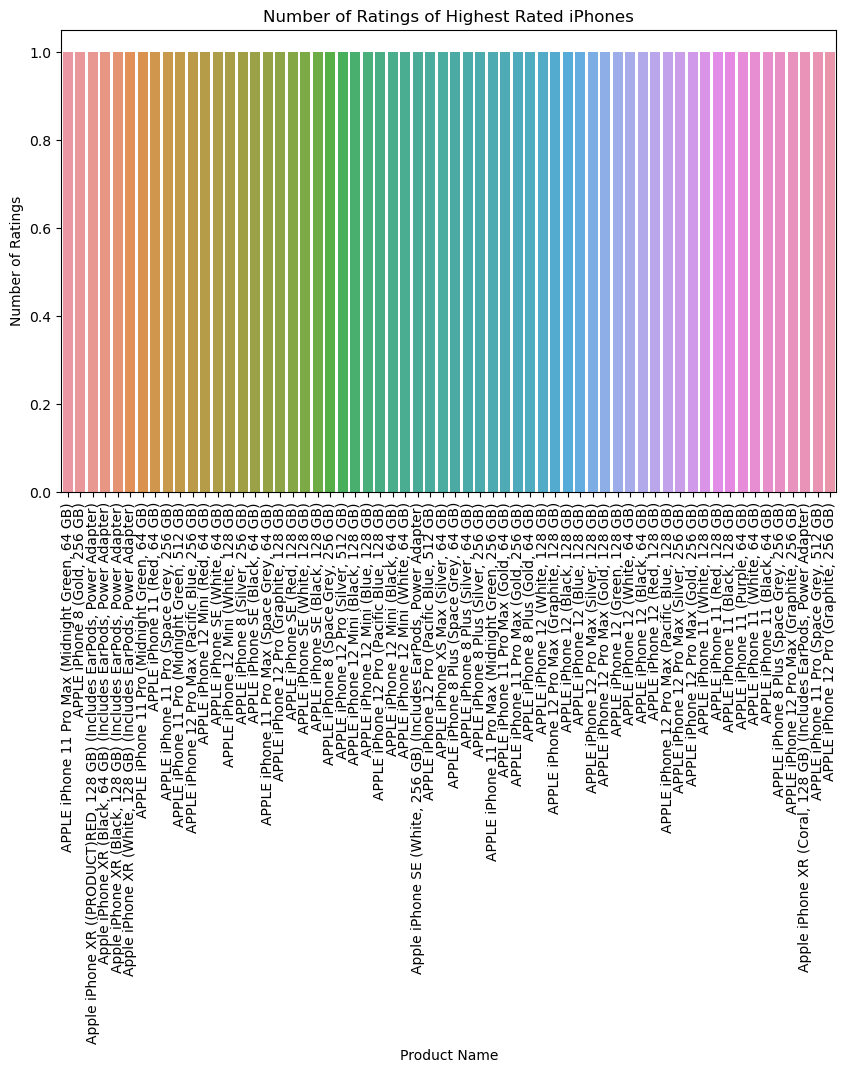

In [27]:
#Analyze the number of ratings of the highest-rated iPhones

iphones = highest_rated["Product Name"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=iphones.index, y=iphones.values)
plt.title("Number of Ratings of Highest Rated iPhones")
plt.xlabel("Product Name")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=90)
plt.show()

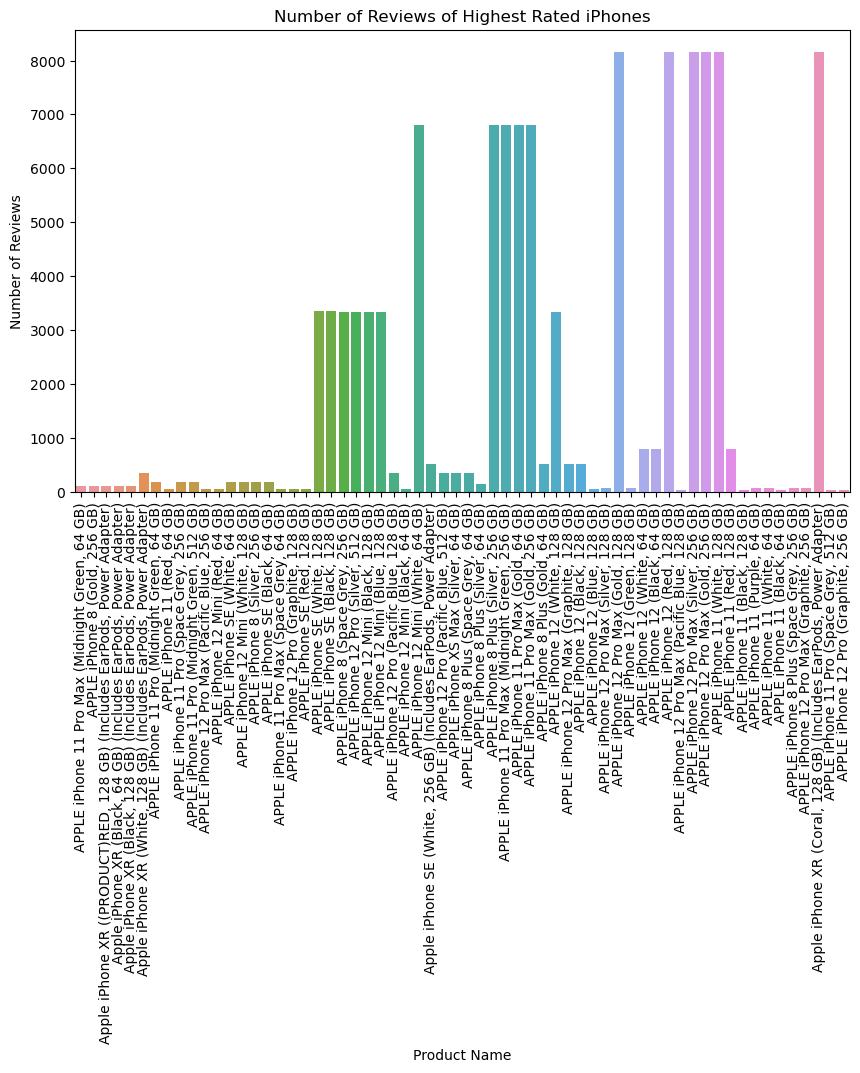

In [28]:
#Analyze the number of reviews of the highest-rated iPhones

reviews = highest_rated["Number Of Reviews"]

plt.figure(figsize=(10, 6))
sns.barplot(x=iphones.index, y=reviews)
plt.title("Number of Reviews of Highest Rated iPhones")
plt.xlabel("Product Name")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=90)
plt.show()

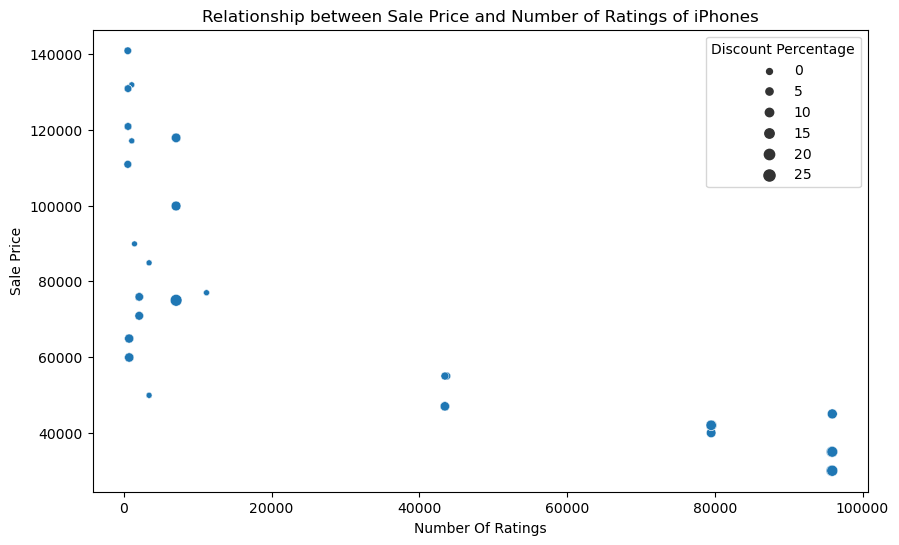

In [29]:
#Analyze the relationship between the sale price and number of ratings of iPhones

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Number Of Ratings", y="Sale Price", size="Discount Percentage")
plt.title("Relationship between Sale Price and Number of Ratings of iPhones")
plt.show()

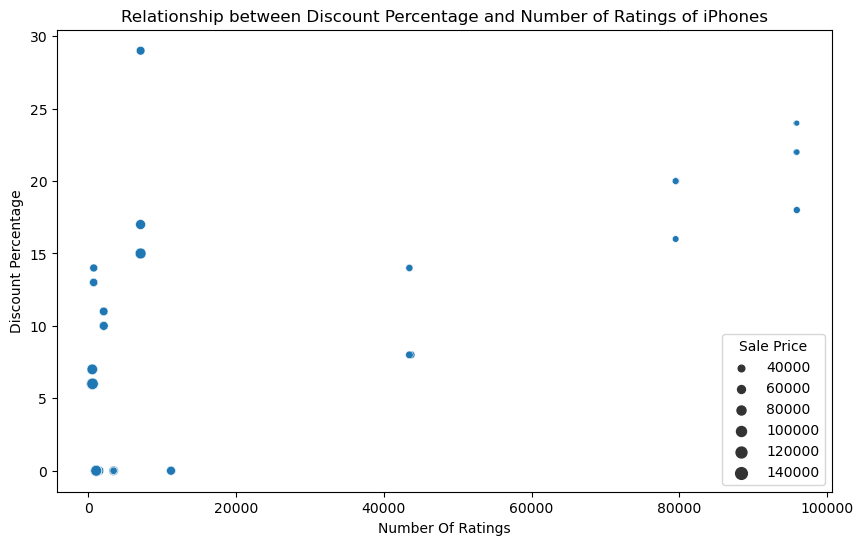

In [30]:
#Analyze the relationship between the discount percentage and number of ratings of iPhones

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Number Of Ratings", y="Discount Percentage", size="Sale Price")
plt.title("Relationship between Discount Percentage and Number of Ratings of iPhones")
plt.show()

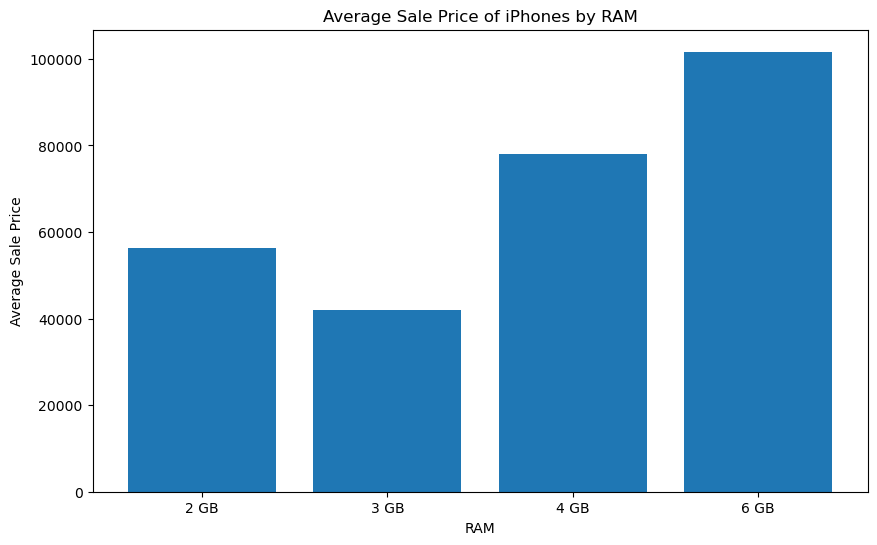

In [31]:
#Analyze the average sale price of iPhones by RAM

avg_price_by_ram = data.groupby("Ram")["Sale Price"].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_ram["Ram"], avg_price_by_ram["Sale Price"])
plt.title("Average Sale Price of iPhones by RAM")
plt.xlabel("RAM")
plt.ylabel("Average Sale Price")
plt.show()


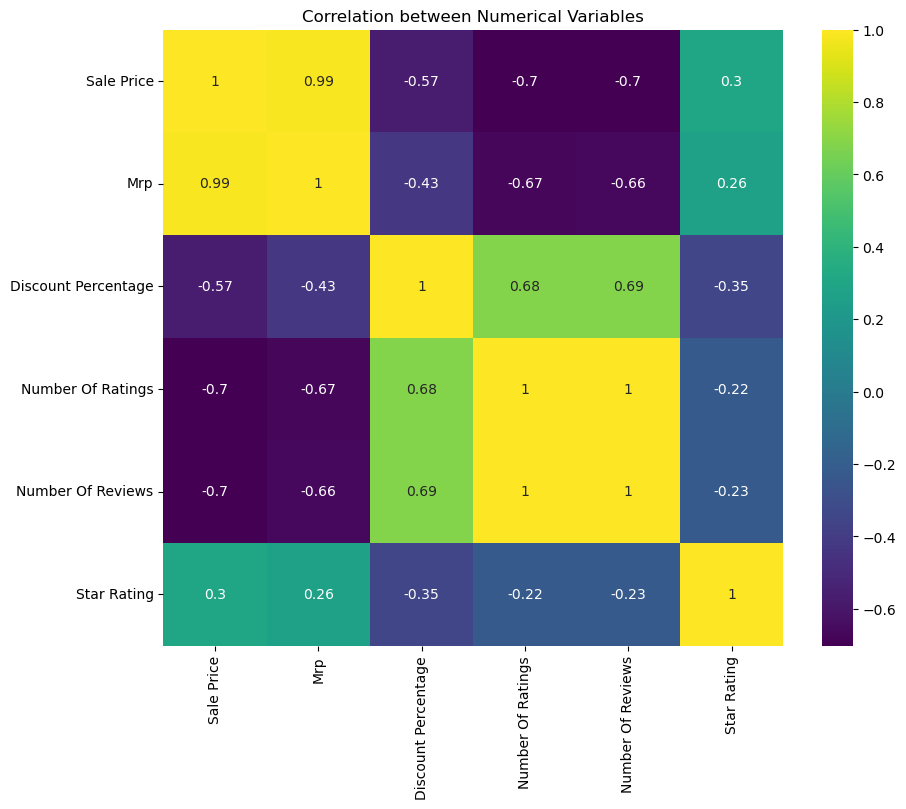

In [32]:
#Analyze the correlation between different numerical variables

correlation_matrix = data[["Sale Price", "Mrp", "Discount Percentage", "Number Of Ratings", "Number Of Reviews", "Star Rating"]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis")
plt.title("Correlation between Numerical Variables")
plt.show()

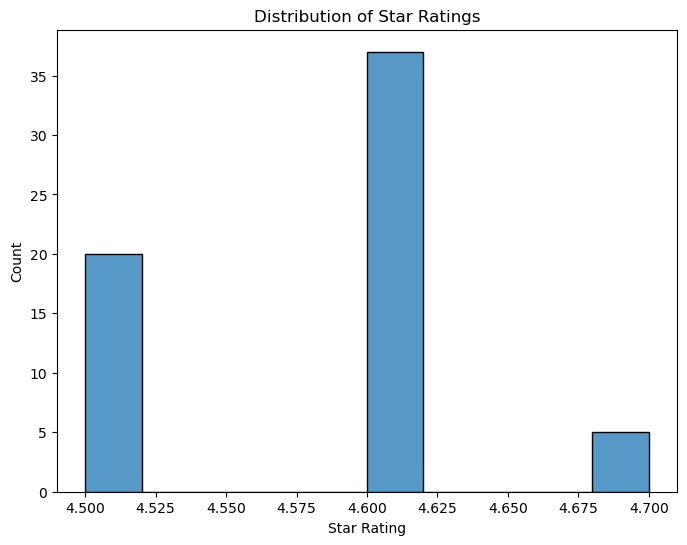

In [33]:
#Analyze the distribution of star ratings

plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="Star Rating", bins=10)
plt.title("Distribution of Star Ratings")
plt.show()